# Random Forest Classifier

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [43]:
Cancer_Data = pd.read_csv('/content/Cancer_Data_2.csv', encoding = "UTF-8")
#Cancer_Data["diagnosis"] = Cancer_Data["diagnosis"].replace("M",1)
#Cancer_Data["diagnosis"] = Cancer_Data["diagnosis"].replace("B",0)
print(Cancer_Data.shape)

(569, 33)


In [44]:
print(Cancer_Data[0:5])

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [45]:
x_Cancer_Data = Cancer_Data.iloc[:, 2:32].values

In [46]:
y_Cancer_Data = Cancer_Data['diagnosis']

In [47]:
x_train,x_test, y_train, y_test = train_test_split(x_Cancer_Data,y_Cancer_Data , random_state=99)

# RandomForestClassifier 

In [48]:
clf = RandomForestClassifier(criterion="gini", max_depth=8, 
                             min_samples_split=10,
                             random_state=5
                             )

default=”gini” = A função para medir a qualidade de uma divisão. min_samples_split = O número mínimo de amostras necessárias para dividir um nó interno. random_state = Controla tanto a aleatoriedade das amostras usadas na construção das árvores.

In [49]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [50]:
y_pred = clf.predict(x_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

In [51]:
clf.classes_

array(['B', 'M'], dtype=object)

In [52]:
accuracy_score(y_test, y_pred)

0.972027972027972

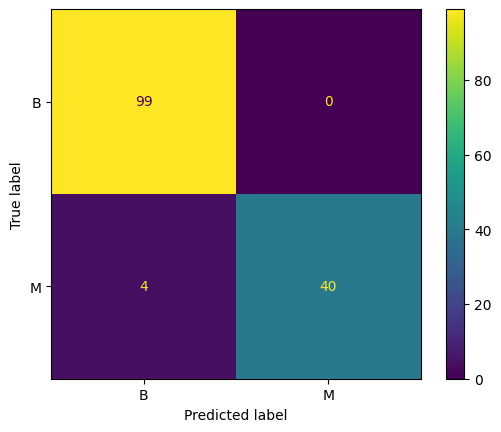

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=clf.classes_).plot()
plt.grid(False)
plt.show()